# Netflix Data Analysis Using Python

### Objective
The goal of this project is to analyze Netflix’s content library to identify key trends such as:
- Distribution of Movies and TV Shows
- Top 10 Countries with Most Netflix Content
- Most popular genres
- Content release trends over the years
- Rating and regional patterns
- Top 10 Directors with Most Netflix Titles

### Tools Used
- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn


In [59]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load dataset
df= pd.read_csv("C:/Users/ACN/Desktop/Netflix_data_analysis/netflix_titles.csv")

# Make plots look nicer
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

#display first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Observation
The dataset contains details about Netflix titles, including type, director, cast, country, date added, release year, rating, duration, and description.
Each row represents one movie or TV show.


In [60]:
# missing values
df.info()

# Check missing values
df.isnull().sum()

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Fill missing values where appropriate
df.fillna({'country':'Unknown'}, inplace=True)
df.fillna({'date_added':'Unknown'}, inplace=True)
df.fillna({'rating':'Unknown'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Observation 

The dataset contains 8,807 entries (rows) and 12 columns (features).<br>
Most columns are of object (string/text) type, except for release_year, which is integer (int64).

There are some missing values in several columns:
<br>
Director: 6173 non-null → about 30% missing
<br>
Cast: 7982 non-null → about 9% missing
<br>
Country: 7976 non-null → about 9% missing
<br>
Date_added: 8797 non-null → about 10 missing
<br>
Rating: 8803 non-null → 4 missing
<br>
Duration: 8804 non-null → 3 missing
<br>

The rest of the columns (show_id, type, title, listed_in, description, release_year) have no missing values.
Overall, the dataset is quite clean, but we’ll need to handle the missing values in columns like director, cast, and country before deeper analysis.

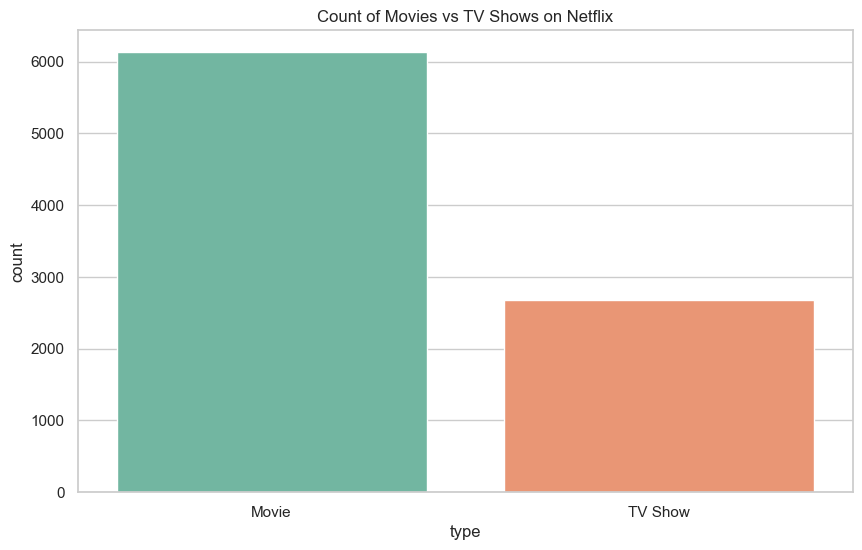

In [88]:
sns.countplot(x='type', data=df, palette='Set2', hue = 'type', legend= False)
plt.title("Count of Movies vs TV Shows on Netflix")
plt.show()

### Observation
The bar chart shows that **Movies** make up the majority of content on Netflix compared to **TV Shows**.  
This indicates that Netflix focuses more on individual films than long-form series.


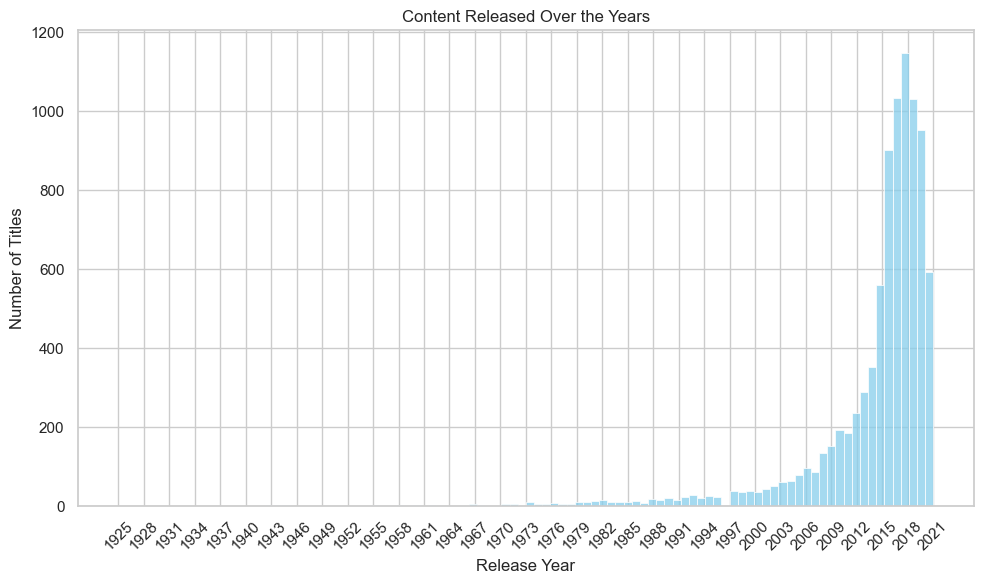

In [117]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=100, kde=False, color='skyblue')

plt.title("Content Released Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")

plt.xticks(
    ticks=range(int(df['release_year'].min()), int(df['release_year'].max()) + 1, 3),
    rotation=45
)

plt.tight_layout()
plt.show()


### Observation
The number of titles added to Netflix increased rapidly after **2015**, peaking around **2018–2019**.  
This trend shows Netflix's aggressive expansion period when it invested heavily in global content.


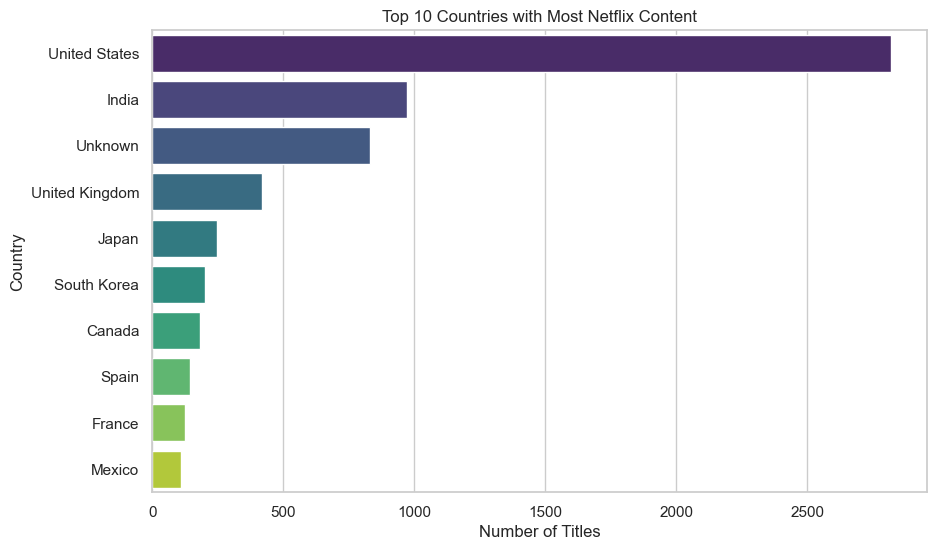

In [97]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis',hue = top_countries.index, legend=False )
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


### Observation
The **United States** leads in Netflix content production, followed by **India** and **United Kingdom**.  
This indicates Netflix’s strong collaborations with these film industries.


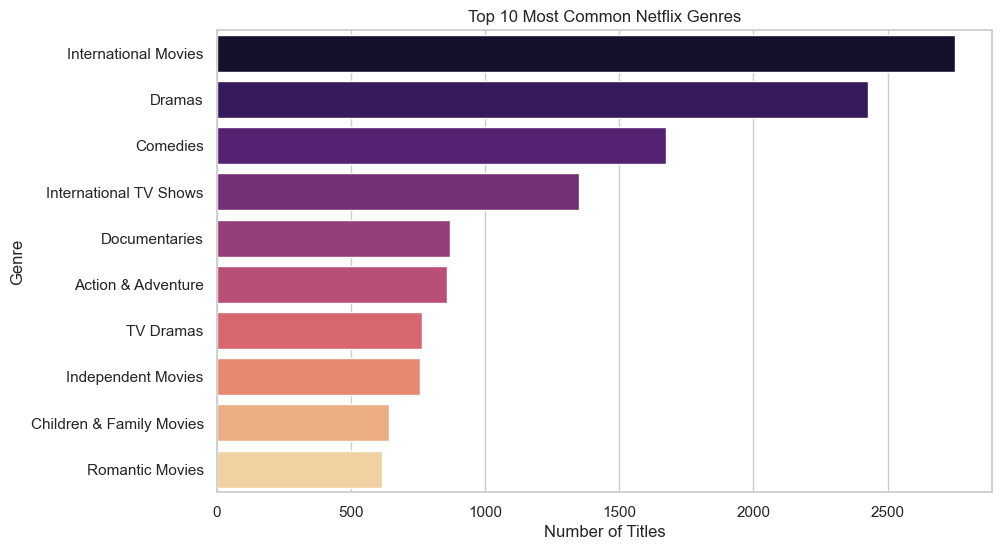

In [102]:
from collections import Counter

# Split genres (listed_in column) and count
genre_list = df['listed_in'].dropna().apply(lambda x: x.split(', '))
genres = [g for sublist in genre_list for g in sublist]
genre_count = Counter(genres).most_common(10)

genres, counts = zip(*genre_count)
sns.barplot(x=list(counts), y=list(genres), palette='magma', hue = list(genres), legend = False)
plt.title("Top 10 Most Common Netflix Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


### Observation
From the visualization, we can observe that Netflix’s content library is dominated by a few key genres. 
The most common genres include *International Movies*, *Dramas*, and *Comedies*, followed closely by *Documentaries* and *Action & Adventure*. 

This indicates that Netflix’s catalog heavily emphasizes diverse storytelling (especially international and drama-based content) and caters to a global audience. 
It also reflects the platform’s broad mix of entertainment categories, with drama and comedy being consistently popular among viewers.


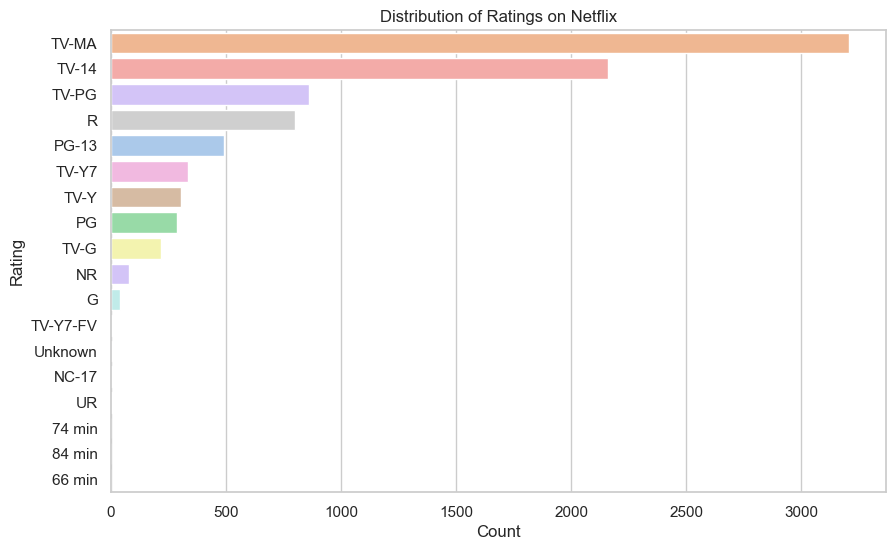

In [109]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='pastel', hue = 'rating')
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

### Observation
The most common rating on Netflix is **TV-MA**, followed by **TV-14** and **TV-PG**.  
This suggests that a large portion of Netflix content is intended for mature audiences.


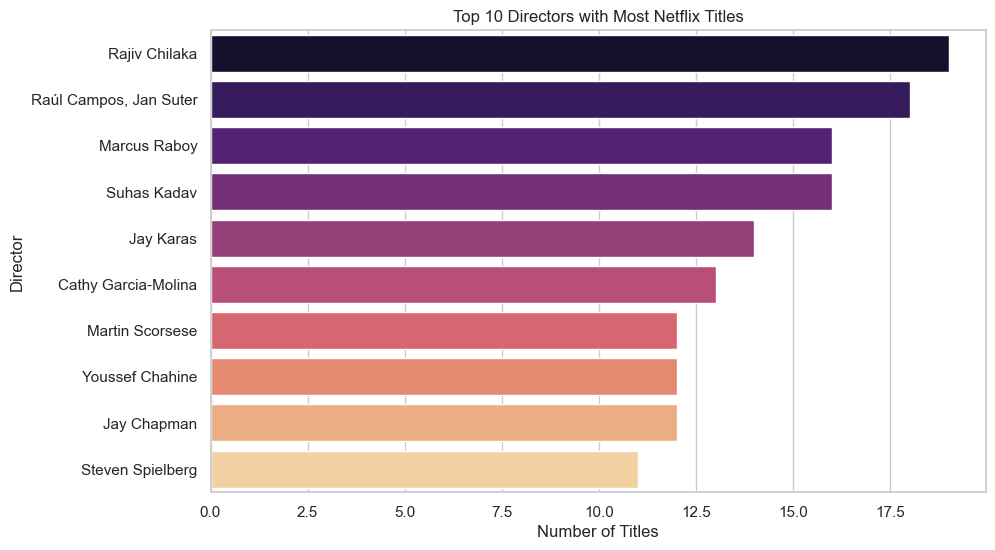

In [86]:
# Step 1: Convert your top directors Series into a DataFrame
top_directors = director_counts.head(10).reset_index()
top_directors.columns = ['director', 'count']  
sns.barplot(data=top_directors, x='count', y='director', hue='director', palette='magma', legend=False)

plt.title("Top 10 Directors with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()



### Observation
The top director in the dataset is **Rajiv Chilaka**, who is known for producing several animated series.  
This shows that Netflix’s catalog features recurring creators with multiple works under their names.


## 🧾 Conclusion
- Netflix has more **Movies** than **TV Shows**.  
- The platform's content library expanded quickly after **2015**.  
- Most content is rated **TV-MA**, targeting mature audiences.  
- The **U.S.**, **India**, and **U.K.** dominate Netflix’s production catalog.  
- Directors like **Rajiv Chilaka** have multiple works, showing strong creator partnerships.

This analysis provides insight into how Netflix grew globally and diversified its content library using Python for real-world data exploration.
